# Деградирует ли музыка?

Добро пожаловать!

В этом проекте мы проанализируем с помощью всей мощи современного программирования на Python современную (и не только) музыку. 

## Задачи

<b>Задача 1.</b>. Написать функцию, которая по названию песни и исполнителю возвращает текст песни, используя *BeautifulSoup* и API сайта genius.com

<b>Задача 2.</b> Проанализировать тексты песен, вошедших в ежегодные списки Billboard Hot 100, на число уникальных слов и содержание ненормативной лексики.

<b>Задача 3.</b> Проанализировать датасеты с сайта kaggle.com и построить графики: altair, SQL, R.

<b>Задача 4.</b> Построить граф из артистов, записавших совместные композиции. Проверить для двух музыкантов, есть ли между ними путь из совместных треков - реализовано с помощью Streamlit.


Используемые датасеты:

https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

https://www.kaggle.com/dhruvildave/billboard-the-hot-100-songs



Times Square — для вдохновения

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url="https://storage.googleapis.com/pr-newsroom-wp/1/2020/12/BILLBOARD-TIMES-SQUARE-1-768x672.jpg", width=1000)

### Непосредственно, код:

In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re

Для работы с текстами песен воспользуемся <a href = 'https://docs.genius.com/'>Genius API</a>:

Зарегистрировавшись, забираем ключи (API Token) и идём скрэппить.

Задача: написать функцию, которая по имени артиста и названию трека возвращает текст песни.

In [3]:
GENIUS_API_TOKEN = 'ySrjuBDWpkWA2XMB9395RqqSUYKbKfxGKZG35oBfy6QZJe5IhApuEB70UaDxStGU'

Итак, функция, которая по названию песни и исполнителю возвращает её текст. Воспользуемся поиском с помощью Genius API, вытащим ссылку на страницу с текстом песни и поскреппим.

Как правило, страница песни на сайте genius.com, кроме самого текста, содержит строчки типа Chorus, Outro и т.д.

Помимо них, хочется убрать знаки препинания, а еще куски текста в скобках. Такое бывает, например, когда используется прием в пении, который называется <a href = 'https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D0%BD%D0%BE%D0%BD_(%D0%BC%D1%83%D0%B7%D1%8B%D0%BA%D0%B0)'>канон</a>, если не путаю: 

Уберем их с помощью <b>регулярных выражений</b>!

In [4]:
def lyrics(title_artist):
    try:
        #пример аргумента: '"Watermelon Sugar" - Harry Styles'
        song = title_artist
        #Ищем ссылку на текст песни с помощью Genius API
        entrypoint = 'https://api.genius.com'
        headers = {'Authorization': 'Bearer ' + GENIUS_API_TOKEN}
        search = entrypoint + '/search?per_page=10&page=' + str(1)
        data = {'q': song}
        response = requests.get(search, data=data, headers=headers)
        link = response.json()['response']['hits'][0]['result']['url']

        #Теперь заходим по полученной ссылке на genius.com, чтобы вытащить текст песни.
        #Из-за JavaScript возникают проблемы, поэтому приходится делать несколько попыток.
        #Методом проб и ошибок установлено, что в среднем нужно не более трёх попыток
        number_of_attempts = 10
        lyrics = None
        for i in range(number_of_attempts):
            r = requests.get(link)
            soup = BeautifulSoup(r.content, 'lxml')
            lyrics = soup.find('div', class_="lyrics")
            if lyrics is not None:
                break

        if lyrics is None:
            return None

        lyrics = lyrics.text
        #а вот и регулярки пригодились: уберем знаки препинания, кавычки, 'Intro', 'Chorus', 'Verse' и прочee
        lyrics = re.sub(r'[\(\[].*?[\)\]]', ' ', lyrics)
        lyrics = re.sub(r'[,.;@#?!&$"]+\ *', ' ', lyrics)
        lyrics = lyrics.split()
        if lyrics == []:
            return None
        return lyrics
    except:
        return None

In [5]:
lyrics('"Watermelon Sugar" - Harry Styles')

['Tastes',
 'like',
 'strawberries',
 'on',
 'a',
 'summer',
 "evenin'",
 'And',
 'it',
 'sounds',
 'just',
 'like',
 'a',
 'song',
 'I',
 'want',
 'more',
 'berries',
 'and',
 'that',
 'summer',
 "feelin'",
 "It's",
 'so',
 'wonderful',
 'and',
 'warm',
 'Breathe',
 'me',
 'in',
 'breathe',
 'me',
 'out',
 'I',
 "don't",
 'know',
 'if',
 'I',
 'could',
 'ever',
 'go',
 'without',
 "I'm",
 'just',
 'thinking',
 'out',
 'loud',
 'I',
 "don't",
 'know',
 'if',
 'I',
 'could',
 'ever',
 'go',
 'without',
 'Watermelon',
 'sugar',
 'high',
 'Watermelon',
 'sugar',
 'high',
 'Watermelon',
 'sugar',
 'high',
 'Watermelon',
 'sugar',
 'high',
 'Watermelon',
 'sugar',
 'Strawberries',
 'on',
 'a',
 'summer',
 "evenin'",
 'Baby',
 "you're",
 'the',
 'end',
 'of',
 'June',
 'I',
 'want',
 'your',
 'belly',
 'and',
 'that',
 'summer',
 "feelin'",
 'Getting',
 'washed',
 'away',
 'in',
 'you',
 'Breathe',
 'me',
 'in',
 'breathe',
 'me',
 'out',
 'I',
 "don't",
 'know',
 'if',
 'I',
 'could',
 'eve

Самое интересное: подсчет ненормативной лексики. https://pypi.org/project/profanity-check/

Напишем функцию *vocabulary(song)*, которая по списку *song* слов текста песни возвращает общее число слов, число уникальных слов, количество ненормативной лексики и уникальное число нецензурных слов.

In [6]:
#%pip install alt-profanity-check

In [7]:
from profanity_check import predict

In [8]:
def vocabulary(song):
    try:
        words = len(song)
        unique_words = len(set(song))
        profane_words = predict(song).sum()
        unique_profane_words = predict(set(song)).sum()
        return np.array([words, unique_words, profane_words, unique_profane_words])
    except TypeError:
        return None

In [9]:
vocabulary(lyrics("Rockstar - DaBaby"))

array([615, 242,  26,   9], dtype=int64)

Grammys: https://www.kaggle.com/unanimad/grammy-awards

# SPOTIFY API

Воспользуемся <a href = 'https://developer.spotify.com/documentation/web-api/'>API Spotify</a>.
Для этого подключим библиотеку <a href = 'https://spotipy.readthedocs.io/en/2.16.1/'> Spotipy</a>:

In [10]:
#%pip install spotipy

In [11]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

Так и не удалось полноценно применить в проекте. Было жалко удалять, поэтому давайте просто посмотрим на картинки:

In [12]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [13]:
SPOTIPY_CLIENT_ID = '1273f78b072242cfb26112faa3610519'
SPOTIPY_CLIENT_SECRET = 'a023cb2826e0452e98420fc5e3f24325'

In [14]:
birdy_uri = 'spotify:artist:2WX2uTcsvV5OnS0inACecP'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET))

In [15]:
name = 'Elton John' #можно ввести имя любого артиста

In [16]:
results = spotify.search(q='artist:' + name, type='artist')
items = results['artists']['items']
image = None
if len(items) > 0:
    artist = items[0]
    image = Image(url=artist['images'][0]['url'])
image

Наконец, для анализа текстов популярных песен посмотрим на ежегодный список BillBoard Year-End Hot 100.

Проще всего зайти на Википедию: https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1970

Соберем списки, начиная с 1959 года

In [17]:
#собираем данные с 1959 года
billboard_ratings = []

for year in range(1959, 2021):
    url = f'https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_{year}'
    bb_top = pd.read_html(url)[0]
    #тут с Википедией некоторые проблемы
    if year in [2012, 2013]:
        bb_top = pd.read_html(url)[1]
    bb_top['year'] = year
    end = 101
    #в 1969 году в рейтинг вошла 101 композиция
    if year == 1969:
        end = 102
    bb_top['position'] = pd.Series(i for i in range(1, end))    
    #убираем первую колонку с номерами
    billboard_ratings.append(bb_top.iloc[:, 1:])

In [18]:
billboard = pd.concat(billboard_ratings, ignore_index=True)
billboard

,Title,Artist(s),year,position
0,"""The Battle of New Orleans""",Johnny Horton,1959,1
1,"""Mack the Knife""",Bobby Darin,1959,2
2,"""Personality""",Lloyd Price,1959,3
3,"""Venus""",Frankie Avalon,1959,4
4,"""Lonely Boy""",Paul Anka,1959,5
...,...,...,...,...
6196,"""More Than My Hometown""",Morgan Wallen,2020,96
6197,"""Lovin' on You""",Luke Combs,2020,97
6198,"""Said Sum""",Moneybagg Yo,2020,98
6199,"""Slide""",H.E.R. featuring YG,2020,99


In [19]:
#уберем кавычки
billboard['Title'] = billboard['Title'].apply(lambda s: s.replace('"', ''))
billboard

,Title,Artist(s),year,position
0,The Battle of New Orleans,Johnny Horton,1959,1
1,Mack the Knife,Bobby Darin,1959,2
2,Personality,Lloyd Price,1959,3
3,Venus,Frankie Avalon,1959,4
4,Lonely Boy,Paul Anka,1959,5
...,...,...,...,...
6196,More Than My Hometown,Morgan Wallen,2020,96
6197,Lovin' on You,Luke Combs,2020,97
6198,Said Sum,Moneybagg Yo,2020,98
6199,Slide,H.E.R. featuring YG,2020,99


In [20]:
#столбец Artist(s) был разделен на два.
#Разделение произошло там, где число исполнителей было больше 1 (в качестве разделителя) использовалось слово featuring.
#В процессе выполнения проекта выяснилось, что это было не нужно.
#Строчка кода была удалена, а таблица сохранилась (см. ниже)

In [21]:
from tqdm import tqdm

In [22]:
def stats(song):
    return vocabulary(lyrics(song))

Выполнение следующей строчки заняло более 6 часов, поэтому она закомментирована. Был проанализирован текст каждой песни из таблицы *billboard*, подсчитано число слов, число уникальных слов, число нецензурных слов (а точнее слов, которых библиотека profanity-check сочла таковыми) и число уникальных нецензурных слов. 

In [258]:
#billboard['lyrics_stats'] = (billboard['Title'] + ' ' + billboard['Artist(s)']).progress_apply(stats)

100%|████████████████████████████████████████████████████████████████████████████| 6201/6201 [6:09:04<00:00,  3.57s/it]


Сохраним полученный датафрейм (эта строка также закомментирована).

In [23]:
#billboard.to_pickle('songs_with_stats.pkl')

Откроем его.

In [24]:
billboard = pd.read_pickle("songs_with_stats.pkl")

In [25]:
billboard

,Title,Artist(s),year,position,featuring,lyrics_stats
0,The Battle of New Orleans,Johnny Horton,1959,1,None,"[405, 142, 2, 2]"
1,Mack the Knife,Bobby Darin,1959,2,None,"[224, 136, 1, 1]"
2,Personality,Lloyd Price,1959,3,None,"[185, 52, 7, 1]"
3,Venus,Frankie Avalon,1959,4,None,"[166, 73, 0, 0]"
4,Lonely Boy,Paul Anka,1959,5,None,"[144, 66, 0, 0]"
...,...,...,...,...,...,...
6196,More Than My Hometown,Morgan Wallen,2020,96,None,"[424, 171, 4, 4]"
6197,Lovin' on You,Luke Combs,2020,97,None,"[222, 85, 0, 0]"
6198,Said Sum,Moneybagg Yo,2020,98,None,"[565, 255, 39, 11]"
6199,Slide,H.E.R.,2020,99,YG,"[586, 198, 10, 8]"


In [26]:
#оказывается, слово fool пакет profanity-check тоже считает за profane
#этим объясняется, например, что lyrics_stats не содержит нулей в строке с песней "Personality - Lloyd Price"

Разделим столбец *lyrics_stats* на четыре:

In [27]:
lyrics_stats = billboard[['year', 'lyrics_stats']].dropna()[['year', 'lyrics_stats']].copy()
lyrics_stats.head(3)

,year,lyrics_stats
0,1959,"[405, 142, 2, 2]"
1,1959,"[224, 136, 1, 1]"
2,1959,"[185, 52, 7, 1]"


In [28]:
stats = pd.DataFrame(lyrics_stats['lyrics_stats'].to_list(), columns=['w_total','unique_w', 'profane', 'unique_profane'])

In [29]:
df = lyrics_stats.reset_index().join(stats)
df

,index,year,lyrics_stats,w_total,unique_w,profane,unique_profane
0,0,1959,"[405, 142, 2, 2]",405,142,2,2
1,1,1959,"[224, 136, 1, 1]",224,136,1,1
2,2,1959,"[185, 52, 7, 1]",185,52,7,1
3,3,1959,"[166, 73, 0, 0]",166,73,0,0
4,4,1959,"[144, 66, 0, 0]",144,66,0,0
...,...,...,...,...,...,...,...
4812,6196,2020,"[424, 171, 4, 4]",424,171,4,4
4813,6197,2020,"[222, 85, 0, 0]",222,85,0,0
4814,6198,2020,"[565, 255, 39, 11]",565,255,39,11
4815,6199,2020,"[586, 198, 10, 8]",586,198,10,8


Как мы видим, более 1000 песен потерялось после применения *.dropna()*. Посмотрим, сколько песен от каждого года осталось:

In [30]:
df.groupby('year').count()

,index,lyrics_stats,w_total,unique_w,profane,unique_profane
year,,,,,,
1959,97,97,97,97,97,97
1960,95,95,95,95,95,95
1961,94,94,94,94,94,94
1962,95,95,95,95,95,95
1963,96,96,96,96,96,96
1964,98,98,98,98,98,98
1965,67,67,67,67,67,67
1978,1,1,1,1,1,1
1979,98,98,98,98,98,98


Куда-то пропали семидесятые. Можно было бы еще раз поскреппить genius.com, но не будем терять время. Возьмем период с 1979 по 2020 год.

Некоторые песни заскреппились неправильно, например, вместо текста песен скопировался целый поисковый результат. Ограничим число слов отметкой в 1500 (если посмотреть глазами, можно увидеть, что обычно текст песни имеет в среднем слов 300-500).

<AxesSubplot:xlabel='year'>

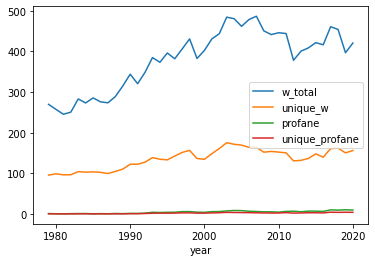

In [31]:
df[(df['w_total'] < 1500) & (df['year'] > 1978)].groupby('year').mean()[['w_total', 'unique_w', 'profane', 'unique_profane']].plot()

In [32]:
df['profane-total-ratio'] = df['profane'] / df['w_total']

In [33]:
df['unique_profane-total-ratio'] = df['unique_profane'] / df['unique_w']

<AxesSubplot:xlabel='year'>

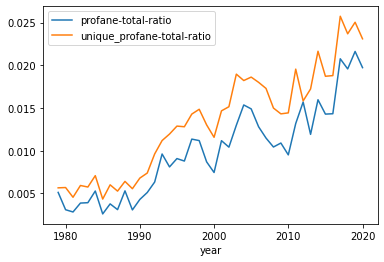

In [34]:
vocab_ratio = df[(df['w_total'] < 1500) & (df['year'] > 1978)].groupby('year')[['profane-total-ratio', 'unique_profane-total-ratio']].mean()
vocab_ratio.plot()

<AxesSubplot:xlabel='year'>

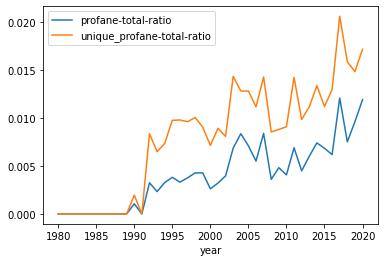

In [35]:
#медиана
df[(df['w_total'] < 1500) & (df['year'] > 1979)].groupby('year')[['profane-total-ratio', 'unique_profane-total-ratio']].median().plot()

<AxesSubplot:xlabel='year'>

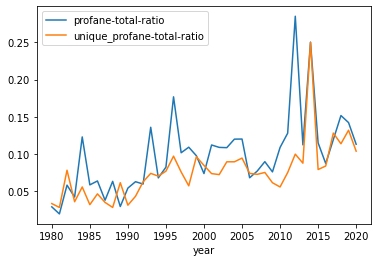

In [36]:
#максимум
df[(df['w_total'] < 1500) & (df['year'] > 1979)].groupby('year')[['profane-total-ratio', 'unique_profane-total-ratio']].max().plot()

Явно наблюдается тренд в доле нецензурной лексики в популярных песнях. Самое время подключить машинное обучение!

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
regr = LinearRegression()

In [39]:
df = vocab_ratio.reset_index()

In [40]:
X = df[['year']]

In [41]:
y = df['unique_profane-total-ratio']

In [42]:
regr.fit(X, y)

LinearRegression()

In [43]:
import matplotlib.pyplot as plt

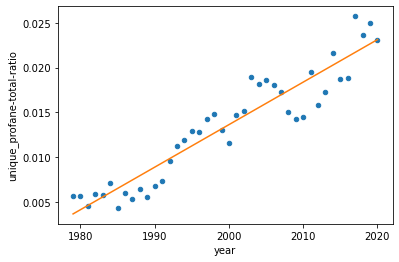

In [44]:
df.plot.scatter('year', 'unique_profane-total-ratio')
plt.plot(X['year'], regr.predict(X), color='C1')

**Вывод:** очевиден. За 40 лет отношение уникальной нецензурной лексики к числу уникальных слов в текстах популярных песен увеличилось в 5 раз!

Можно было бы провести более глубокий анализ, подсчитав количество разговорных, нейтральных и литературных слов в текстах песен и посмотрев, как их соотношение менялось с течением времени (на что и был изначальный расчет). Однако это потребовало бы гораздо больше времени, да и к тому же мне не удалось найти подходящей библиотеки.

# Тренды Billboard The Hot 100 Songs

In [5]:
import pandas as pd
import datetime
import ipywidgets as widgets
import altair as alt

In [6]:
charts = pd.read_csv('bb_charts.csv')
charts

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,1958-08-04,1,Poor Little Fool,Ricky Nelson,NaN,1,1
1,1958-08-04,2,Patricia,Perez Prado And His Orchestra,NaN,2,1
2,1958-08-04,3,Splish Splash,Bobby Darin,NaN,3,1
3,1958-08-04,4,Hard Headed Woman,Elvis Presley With The Jordanaires,NaN,4,1
4,1958-08-04,5,When,Kalin Twins,NaN,5,1
...,...,...,...,...,...,...,...
327582,2021-05-15,96,If Pain Was A Person,Moneybagg Yo,54.0,54,2
327583,2021-05-15,97,Tampa,Cico P,NaN,97,1
327584,2021-05-15,98,Hello,Pop Smoke Featuring A Boogie Wit da Hoodie,NaN,84,7
327585,2021-05-15,99,Way Less Sad,AJR,99.0,99,2


In [7]:
charts['date'] = pd.to_datetime(charts['date'])

Посмотрите на статистику Элвиса Пресли. Это выглядит забавно.

In [8]:
def chart(artist1, artist2, start_date, end_date):
    global charts
    charts = charts[(charts['date'] >= start_date) & (charts['date'] <= end_date)]
    
    charts_artist = charts[(charts['artist'].str.find(artist1) == 0) | (charts['artist'].str.find(artist2) == 0)]


    delta = (charts_artist['date'].iloc[-1] - charts_artist['date'].iloc[0]).days

    width = delta * 1.2
    height = 400

    highlight = alt.selection(type='single', on='mouseover',
                              fields=['artist'], nearest=True)

    base = alt.Chart(charts_artist).encode(
        x='date:T',
        y= alt.Y('rank:Q', scale=alt.Scale(domain=[100,1])),
        color='song:N',
        tooltip=['song', 'artist', 'rank', 'date', 'weeks-on-board'],
        strokeDash='artist',
        strokeWidth=alt.value(4)
    )

    points = base.mark_circle().encode(
        opacity=alt.value(10)
    ).add_selection(
        highlight
    ).properties(
        width=width, height=height
    )

    lines = base.mark_line().encode(
        size=alt.condition(~highlight, alt.value(1), alt.value(3))
    )

    return points + lines

widgets.interact(chart,
                 artist1=widgets.Combobox(options=list(charts['artist'].unique()),
                                          value="Dua Lipa", description='First Artist'),
                 artist2=widgets.Combobox(options=list(charts['artist'].unique()),
                                          value="Harry Styles", description='Second Artist'),
                 start_date=widgets.DatePicker(description='Start Date', disabled=False, value=pd.to_datetime('1940')),
                 end_date=widgets.DatePicker(description='End Date',disabled=False, value=pd.to_datetime('2030')));

interactive(children=(Combobox(value='Dua Lipa', description='First Artist', options=('Ricky Nelson', 'Perez P…

## Граф на музыкантах

Будем строить графы, в которых вершины соответствуют музыкантам. Два вершины соединены ребром, если у соответствующих им музыкантам есть совместная композиция.

### Задача 1. Простой граф

Построим граф, в котором ребро между двумя вершинами проведено, если композиция достаточно популярна (по подсчетам Spotify)

In [50]:
#%pip install pyvis

In [51]:
import networkx as nx
import pandas as pd
from pyvis.network import Network
import itertools as it

In [16]:
df_spotify = pd.read_csv('data_o.csv')
df_spotify[df_spotify['explicit'] == 1]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
14,0.4930,1921,0.01750,['Zay Gatsby'],0.527,205072,0.691,1,0MJZ4hh60zwsYleWWxT5yW,0.384000,7,0.3580,-7.298,1,Power Is Power,0,1921-03-27,0.0326,159.935
18,0.0778,1921,0.14800,['THE GUY'],0.604,204957,0.418,1,0QQmUf4aPFaN9U2yRko595,0.038200,4,0.1020,-11.566,0,When We Die,0,1921-09-11,0.0417,80.073
40,0.5440,1921,0.18500,['THE GUY'],0.577,404062,0.422,1,1T2NGVgAoXjQPEjxTGFRZV,0.034900,1,0.1780,-11.108,1,Love for Guns,0,1921-09-11,0.0575,79.997
88,0.0779,1921,0.58800,['THE GUY'],0.341,323840,0.256,1,3YVy92W44JmU6KeF6UMldm,0.157000,9,0.1050,-16.012,1,Tigers,0,1921-09-11,0.0461,121.051
99,0.4060,1921,0.44700,['THE GUY'],0.708,279171,0.544,1,4SU8RBlxrOtlHjkUxkpDCY,0.037500,0,0.0733,-8.124,1,Don't Run,0,1921-09-11,0.0316,120.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170639,0.5220,2020,0.00861,['Pooh Shiesty'],0.819,177110,0.651,1,7w77k7yCaDOMe25fYxnzit,0.000000,10,0.3780,-5.859,0,7.62 God,62,2020-07-03,0.2910,77.013
170643,0.9070,2020,0.00952,"['DJ Scheme', 'Cordae', 'Ski Mask The Slump Go...",0.917,228333,0.569,1,3C9D1X8NkG2Ak1RaGpRnnQ,0.000000,7,0.0774,-10.456,1,Soda (feat. Take A Daytrip),66,2020-11-13,0.2790,144.014
170646,0.5220,2020,0.20400,['Gunna'],0.598,230600,0.472,1,2f8y4CuG57UJEmkG3ujd0D,0.000015,0,0.1080,-10.991,1,NASTY GIRL / ON CAMERA,66,2020-05-22,0.2580,120.080
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [17]:
df_spotify[df_spotify['explicit'] == 1]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
14,0.4930,1921,0.01750,['Zay Gatsby'],0.527,205072,0.691,1,0MJZ4hh60zwsYleWWxT5yW,0.384000,7,0.3580,-7.298,1,Power Is Power,0,1921-03-27,0.0326,159.935
18,0.0778,1921,0.14800,['THE GUY'],0.604,204957,0.418,1,0QQmUf4aPFaN9U2yRko595,0.038200,4,0.1020,-11.566,0,When We Die,0,1921-09-11,0.0417,80.073
40,0.5440,1921,0.18500,['THE GUY'],0.577,404062,0.422,1,1T2NGVgAoXjQPEjxTGFRZV,0.034900,1,0.1780,-11.108,1,Love for Guns,0,1921-09-11,0.0575,79.997
88,0.0779,1921,0.58800,['THE GUY'],0.341,323840,0.256,1,3YVy92W44JmU6KeF6UMldm,0.157000,9,0.1050,-16.012,1,Tigers,0,1921-09-11,0.0461,121.051
99,0.4060,1921,0.44700,['THE GUY'],0.708,279171,0.544,1,4SU8RBlxrOtlHjkUxkpDCY,0.037500,0,0.0733,-8.124,1,Don't Run,0,1921-09-11,0.0316,120.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170639,0.5220,2020,0.00861,['Pooh Shiesty'],0.819,177110,0.651,1,7w77k7yCaDOMe25fYxnzit,0.000000,10,0.3780,-5.859,0,7.62 God,62,2020-07-03,0.2910,77.013
170643,0.9070,2020,0.00952,"['DJ Scheme', 'Cordae', 'Ski Mask The Slump Go...",0.917,228333,0.569,1,3C9D1X8NkG2Ak1RaGpRnnQ,0.000000,7,0.0774,-10.456,1,Soda (feat. Take A Daytrip),66,2020-11-13,0.2790,144.014
170646,0.5220,2020,0.20400,['Gunna'],0.598,230600,0.472,1,2f8y4CuG57UJEmkG3ujd0D,0.000015,0,0.1080,-10.991,1,NASTY GIRL / ON CAMERA,66,2020-05-22,0.2580,120.080
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [12]:
df_spotify['artists'][0]

"['Sergei Rachmaninoff', 'James Levine', 'Berliner Philharmoniker']"

In [13]:
#в столбце artists лежат не списки с артистами, как хотелось бы, а строковые представления этих списков. Исправим это:
import ast
df_spotify['artists'] = df_spotify['artists'].map(ast.literal_eval)
df_spotify['artists'][0]

['Sergei Rachmaninoff', 'James Levine', 'Berliner Philharmoniker']

Прежде чем перейти к графам, поиграем с этой табличкой.

В таблице есть столбец *explicit*, который заполнен единицами и нулями. Сгруппируем таблицу по годам и посчитаем долю текстов, содержащих нецензурную лексику (у таких песен параметр *explicit* равен 1).

<AxesSubplot:xlabel='year'>

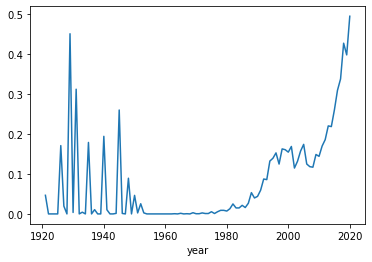

In [14]:
df_spotify.groupby('year').mean()['explicit'].plot()

Начиная с 1950-х годов, график ведет себя вполне предсказуемо. Однако его поведение до этого периода не очень понятно. Вероятно, это связано с тем, что на Spotify помимо песен доступны аудиокниги и они также включены в таблицу.

Поэтому выберем те композиции, в которых параметр *instrumentalness* положителен, но при этом не очень велик - чтобы не включать те треки, где вообще нет слов.

<AxesSubplot:xlabel='year'>

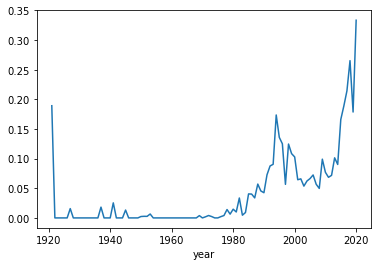

In [19]:
lower_bound = 0.01
upper_bound = 0.6 
df_spotify[(df_spotify['instrumentalness'] > 0.01) & (df_spotify['instrumentalness'] < upper_bound)].groupby('year').mean()['explicit'].plot()

Теперь график выглядит довольно разумно. Видим, что доля песен, содержащих нецензурную лексику, растет со временем. При этом еще 50 лет назад эта доля была нулевой, а сейчас находится примерно на отметке в 30%.

Вернемся к графам.

In [56]:
#выберем те песни, для которых указанное число исполнителей больше 1
feats = df_spotify[[len(song) > 1 for song in df_spotify['artists']]]
feats.head(3)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"[Sergei Rachmaninoff, James Levine, Berliner P...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
15,0.2820,1921,0.989,"[Sergei Rachmaninoff, Ruth Laredo]",0.384,221013,0.171,0,0NFeJgmTAV1kDfzSQNK41Z,0.820,7,0.116,-20.476,0,"10 Préludes, Op. 23: No. 5 in G Minor. Alla ma...",4,1921,0.0319,107.698
17,0.6640,1921,0.996,"[Hector Berlioz, Arturo Toscanini]",0.541,250747,0.283,0,0POO8XaUgW5Qjbv9sbDy8W,0.898,9,0.393,-14.808,1,Rákóczy March,0,1921,0.0477,108.986


In [57]:
#по списку музыкантов возвращает таблицу пар музыкант-музыкант
def pairs(list_of_artists):
    return pd.DataFrame(it.combinations(list_of_artists, 2), columns=['from', 'to'])

Рассмотрим те композиции, для которых параметр *populatiry* превышает 80 (подробнее о том, как вычисляется этот параметр, можно почитать на сайте Spotify). Таких  218:

In [58]:
popularity = 80
popular_tracks = feats[(feats['popularity'] > popularity)]['artists']
popular_tracks

12206     [Eurythmics, Annie Lennox, Dave Stewart]
14607                               [Coolio, L.V.]
16006                          [Eminem, Nate Dogg]
16407                   [Usher, Lil Jon, Ludacris]
16611                       [Shakira, Wyclef Jean]
                            ...                   
140739                   [Camilo, Christian Nodal]
140856                     [Camilo, Pablo Alborán]
155470              [Danna Paola, Sebastian Yatra]
155554                         [David Guetta, Sia]
170574                        [KHEA, Lenny Santos]
Name: artists, Length: 218, dtype: object

Дальше строим граф:

In [59]:
edges = pd.concat([pairs(x) for x in popular_tracks], ignore_index=True)
vertices = list(set(edges['from']) | set(edges['to']))

In [60]:
graph = nx.DiGraph()
graph.add_nodes_from(vertices)
for _, row in edges.iterrows():
    graph.add_edge(row['from'], row['to'])
graph = graph.to_undirected()

In [61]:
%matplotlib inline

In [62]:
net = Network(width='800px', notebook=True)
net.from_nx(graph)

In [63]:
net.show("popular_music_graph.html")

### Задача 2. Нахождение пути между исполнителями

Теперь решим задачу поинтереснее: найдем и построим кратчайший путь между двумя музыкантами

Например, в 1951 году на первом месте оказался Nat King Cole, а в 2020 - The Weeknd.

Построим граф по всем(!) данным и сохраним его в отдельный файл

In [64]:
import pickle

In [65]:
artist1 = 'Nat King Cole'
artist2 = 'The Weeknd'

In [66]:
verges = pd.concat([pairs(x) for x in feats['artists']], ignore_index=True)
vertices = list(set(verges['from']) | set(verges['to']))

In [67]:
graph = nx.DiGraph()
graph.add_nodes_from(vertices)
for _, row in verges.iterrows():
    graph.add_edge(row['from'], row['to'])
graph = graph.to_undirected()

In [68]:
nx.write_gpickle(graph, 'graph.gpickle')

In [69]:
graph = nx.read_gpickle('graph.gpickle')

In [70]:
#найдем кратчайший путь
path = nx.shortest_path(graph, artist1, artist2)
path

['Nat King Cole',
 'Natalie Cole',
 'Juan Luis Guerra 4.40',
 'Romeo Santos',
 'Drake',
 'The Weeknd']

In [71]:
verges = verges[verges['from'].isin(path) | verges['to'].isin(path)]
vertices = list(set(verges['from']) | set(verges['to']))

In [72]:
graph_1 = nx.DiGraph()
graph_1.add_nodes_from(vertices)
for _, row in verges.iterrows():
    graph_1.add_edge(row['from'], row['to'])
graph_1 = graph_1.to_undirected()

In [73]:
net = Network(width='800px', notebook=True)
net.from_nx(graph_1)

In [74]:
%matplotlib inline

In [75]:
net.show("two_musicians_graph.html")

С помощью сохранненого графа удалось реализовать (очень быстрый) поиск таких в путей в **<a href = 'https://ds-music-2021.herokuapp.com/'>Streamlit</a>**.

# SQL

In [76]:
import sqlite3

In [77]:
from sqlalchemy import create_engine

In [78]:
engine = create_engine('sqlite://', echo=False)

In [79]:
charts

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,1958-08-04,1,Poor Little Fool,Ricky Nelson,NaN,1,1
1,1958-08-04,2,Patricia,Perez Prado And His Orchestra,NaN,2,1
2,1958-08-04,3,Splish Splash,Bobby Darin,NaN,3,1
3,1958-08-04,4,Hard Headed Woman,Elvis Presley With The Jordanaires,NaN,4,1
4,1958-08-04,5,When,Kalin Twins,NaN,5,1
...,...,...,...,...,...,...,...
327582,2021-05-15,96,If Pain Was A Person,Moneybagg Yo,54.0,54,2
327583,2021-05-15,97,Tampa,Cico P,NaN,97,1
327584,2021-05-15,98,Hello,Pop Smoke Featuring A Boogie Wit da Hoodie,NaN,84,7
327585,2021-05-15,99,Way Less Sad,AJR,99.0,99,2


In [80]:
charts.to_sql('charts', con=engine)

In [81]:
engine.execute("SELECT * FROM charts").fetchall()

[(0, '1958-08-04 00:00:00.000000', 1, 'Poor Little Fool', 'Ricky Nelson', None, 1, 1),
 (1, '1958-08-04 00:00:00.000000', 2, 'Patricia', 'Perez Prado And His Orchestra', None, 2, 1),
 (2, '1958-08-04 00:00:00.000000', 3, 'Splish Splash', 'Bobby Darin', None, 3, 1),
 (3, '1958-08-04 00:00:00.000000', 4, 'Hard Headed Woman', 'Elvis Presley With The Jordanaires', None, 4, 1),
 (4, '1958-08-04 00:00:00.000000', 5, 'When', 'Kalin Twins', None, 5, 1),
 (5, '1958-08-04 00:00:00.000000', 6, "Rebel-'rouser", 'Duane Eddy His Twangy Guitar And The Rebels', None, 6, 1),
 (6, '1958-08-04 00:00:00.000000', 7, 'Yakety Yak', 'The Coasters', None, 7, 1),
 (7, '1958-08-04 00:00:00.000000', 8, 'My True Love', 'Jack Scott', None, 8, 1),
 (8, '1958-08-04 00:00:00.000000', 9, 'Willie And The Hand Jive', 'The Johnny Otis Show', None, 9, 1),
 (9, '1958-08-04 00:00:00.000000', 10, 'Fever', 'Peggy Lee', None, 10, 1),
 (10, '1958-08-04 00:00:00.000000', 11, 'Ginger Bread', 'Frankie Avalon', None, 11, 1),
 (11, '

Посмотрим, какие артисты больше всего недель присутствовали в рейтинге BillBoard

In [82]:
my_list = engine.execute("""
SELECT artist, count(*), COUNT(DISTINCT song) as songs
FROM charts
GROUP BY artist
HAVING songs > 3
ORDER BY count(*) DESC
""").fetchall()

In [83]:
df = pd.DataFrame(my_list, columns=['artist', 'weeks', 'songs'])

In [84]:
df

,artist,weeks,songs
0,Taylor Swift,1022,119
1,Elton John,889,58
2,Madonna,857,53
3,Kenny Chesney,758,45
4,Drake,744,99
...,...,...,...
1712,Jordan Smith,7,6
1713,Javier Colon,6,4
1714,Glee Cast Featuring Kristin Chenoweth,6,6
1715,Huncho Jack,5,5


Тейлор Свифт обошла Элтона Джона и Мадонну, вау.

Верно ли, что чем больше артист выпустил песен, тем больше он держится в рейтинге?

Посмотрим, как число недель коррелирует с числом песен в рейтринге. Сохраним табличнку и перейдём в R.

In [85]:
df.to_csv('forR.csv')

Откройте файл *final project.Rmd*, там были использованы tidyverse и ggplot2